# Machine Learning: Bank Marketing Campaign 
### Prepared by Muhammad N Rafi

# Problem Statement

Marketing Campaigns Bank biasa dilakukan untuk meningkatkan engagement customer / nasabah. Banyak cara yang dilakukan bank dalam marketing campaigns salah satu cara nya adalah dengan menghubungi calon nasabah via telepon seperti dataset yang kita gunakan pada projek kali ini. Permasalahan utamanya adalah bagaimana bank dapat secara efektif menetukan target customer / nasabah yang berpotensi untuk membuka akun, meminjam kredit atau menggunakan jasa keuangan lainnya namun tetap meminimalisir biaya yang dikeluarkan selama marketing campagings dan menghasilkan return on investment yang baik.

# Goals

Seperti yang sudah disampaikan pada diatas, maka tujuan dari projek ini adalah untuk menghasilkan marketing campaigns yang efektif dengan cara menganalisa calon customer / nasabah. Sehingga dengan projek ini diharapkan mampu memprediksi apakah calon pelanggan akan tertarik atau tidak dari marketing campaigns ini, selain itu projek ini juga dapat membantu bank untuk memantau atau mengukur kinerja marketing campaigns secara real-time dan memberikan saran untuk perbaikan.

# Analytical Approach

Jadi pada projek ini akan membangun sebuah model klasifikasi yang mampu membedakan pelanggan yang berpotensi tertarik pada campaign ini atau tidak.

**Metrics Evaluation:**  
Sehingga dengan demikian metriks evaluasi yang akan digunakan adalah ROC AUC untuk membedakan kelas positif dan kelas negatif dengan baik sehingga dapat meminmalisisr kerugian yang terjadi pada marketing campaigns.

# Data Description
1.  `age` (numerik)
2.  `job`: jenis pekerjaan (kategori: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  `marital`: status pernikahan (kategori: 'divorced','married','single','unknown'; catatan: 'divorced' berarti bercerai atau duda/janda)
4.  `education` (kategori: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.  default: apakah memiliki kredit yang gagal? (kategori: 'no','yes','unknown')
6.  housing: apakah memiliki pinjaman rumah? (kategori: 'no','yes','unknown')
7.  loan: apakah memiliki pinjaman pribadi? (kategori: 'no','yes','unknown')
8.  `contact`: jenis komunikasi kontak (kategori: 'cellular','telephone')
9.  `month`: bulan terakhir kontak dalam setahun (kategori: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.  `day_of_week`: hari terakhir kontak dalam seminggu (kategori: 'mon','tue','wed','thu','fri')
11.  `duration`: durasi kontak terakhir, dalam detik (numerik). Catatan penting: atribut ini sangat memengaruhi target output (misalnya, jika durasi = 0 maka y = 'no'). Namun, durasi tidak diketahui sebelum panggilan dilakukan. Selain itu, setelah akhir panggilan, y jelas diketahui. Oleh karena itu, input ini hanya harus dimasukkan untuk tujuan benchmark dan harus dihapus jika niatnya adalah memiliki model prediksi yang realistis.
12.  `campaign`: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)
13.  `pdays`: jumlah hari yang berlalu setelah klien terakhir kali dihubungi dari kampanye sebelumnya (numerik; 999 berarti klien sebelumnya tidak dihubungi)
14.  `previous`: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)
15.  `poutcome`: hasil dari kampanye pemasaran sebelumnya (kategori: 'failure','nonexistent','success')
16.  `emp.var.rate`: tingkat variasi pekerjaan - indikator triwulanan (numerik)
17.  `cons.price.idx`: indeks harga konsumen - indikator bulanan (numerik)
18.  `cons.conf.idx`: indeks keyakinan konsumen - indikator bulanan (numerik)
19.  `euribor3m`: tingkat euribor 3 bulan - indikator harian (numerik)
20.  `nr.employed`: jumlah karyawan - indikator triwulanan (numerik)
21.  `y` - apakah klien berlangganan deposito jangka panjang? (biner: 'yes','no')

Source: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset

In [58]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_predict, train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler

from sklearn.compose import ColumnTransformer
import category_encoders as ce

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV


from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler


from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve


from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dari informasi diatas terlihat bahwa terdapat 21 kolom yang terdiri dari 1 kolom dependent variable dan 20 kolom independent variable. Total keseluruhan data adalah 41.188 data, dan terlihat sekilas bahwa dari sini tidak terdapat missing values pada masing-masing kolom, namun berdasarkan informasi dataset nilai missing values pada dataset ini berupa `unknown`.

In [5]:
df = df.replace('unknown', np.nan)

In [6]:
df.isna().sum()/len(df)*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

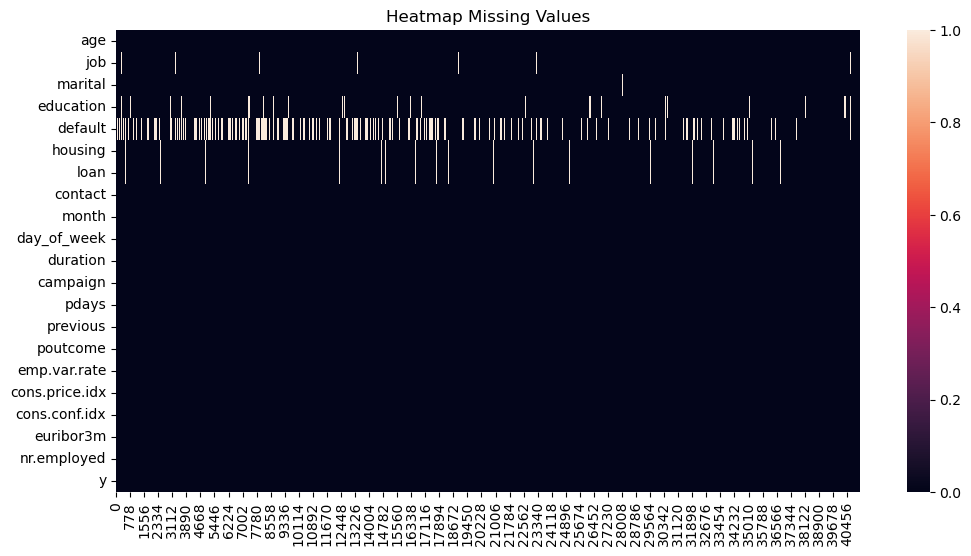

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna().transpose()).set_title('Heatmap Missing Values');

Jika dilihat gambar diatas, terdapat cukup banyak missing values pada beberapa kolom. Maka tindakan yang kita lakukan adalah kita dapat melakukan data yang memiliki missing values di dalamnya mengingat data yang kita gunakan sudah cukup banyak.

In [8]:
# Drop semua baris data yang memiliki missing values di dalamnya
df = df.dropna()

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,30488,30488,30488,30488,30488,30488,30488,30488,30488,30488,30488
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8737,17492,10412,30485,16521,25720,20443,9733,6395,25836,26629


In [12]:
# Handle data categorikal

In [13]:
df['y'] = np.where(df['y'] == 'yes', 1, 0)
df.rename(columns={'y': 'target'}, inplace=True)


**Job Category**

In [14]:
df.job.value_counts()

admin.           8737
blue-collar      5675
technician       5473
services         2857
management       2311
retired          1216
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64

In [15]:
# Define the job categories to group by
job_categories = {'admin.': 'White Collar', 'blue-collar': 'Blue Collar', 'technician': 'Blue Collar', 'services': 'Service Industry',
                  'management': 'White Collar', 'retired': 'Unemployed', 'self-employed': 'Entrepreneur', 'entrepreneur': 'Entrepreneur',
                  'unemployed': 'Unemployed', 'housemaid': 'Blue Collar', 'student': 'Unemployed'}

# Map the job categories to the job column in the DataFrame
df['job'] = df['job'].map(job_categories)
df.job.value_counts()

Blue Collar         11838
White Collar        11048
Service Industry     2857
Unemployed           2564
Entrepreneur         2181
Name: job, dtype: int64

**Education Category**

In [16]:
df.education.value_counts()

university.degree      10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
illiterate                11
Name: education, dtype: int64

In [17]:
df['education'] = np.where(df['education'].isin(['university.degree', 'professional.course']), 'Higher Education',
                  np.where(df['education'].isin(['basic.9y', 'high.school']), 'Secondary Education', 'Elementary Education'))

df.education.value_counts()

Higher Education        14733
Secondary Education     11975
Elementary Education     3780
Name: education, dtype: int64

**Month**

In [18]:
df.month.value_counts()

may    9733
jul    5081
aug    4673
jun    3614
nov    3496
apr    2115
oct     642
sep     495
mar     482
dec     157
Name: month, dtype: int64

In [19]:
df['month'] = np.where(df['month'].isin(['jan', 'feb', 'mar']), 'Q1',
              np.where(df['month'].isin(['apr', 'may', 'jun']), 'Q2', 
              np.where(df['month'].isin(['jul', 'aug', 'sep']), 'Q3', 'Q4')))

df.month.value_counts()

Q2    15462
Q3    10249
Q4     4295
Q1      482
Name: month, dtype: int64

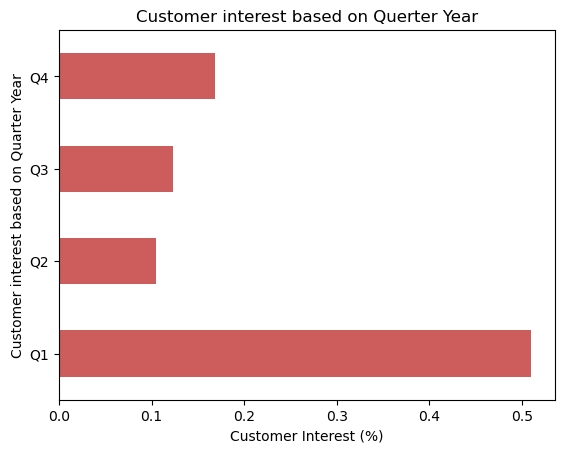

In [20]:
df.groupby('month')['target'].mean().plot(kind='barh', color='indianred')
plt.ylabel('Customer interest based on Quarter Year')
plt.xlabel('Customer Interest (%)')
plt.title('Customer interest based on Querter Year');
plt.show()

**day of week**

In [21]:
df.day_of_week.value_counts()

thu    6395
mon    6279
wed    6125
tue    5955
fri    5734
Name: day_of_week, dtype: int64

day_of_week sebenernya tidak begitu penting

In [22]:
df.poutcome.value_counts()

nonexistent    25836
failure         3461
success         1191
Name: poutcome, dtype: int64

In [23]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,76,"[56, 37, 40, 59, 24, 25, 29, 57, 35, 50, 30, 5..."
1,job,object,0,0.0,5,"[Blue Collar, Service Industry, White Collar, ..."
2,marital,object,0,0.0,3,"[married, single, divorced]"
3,education,object,0,0.0,3,"[Elementary Education, Secondary Education, Hi..."
4,default,object,0,0.0,2,"[no, yes]"
5,housing,object,0,0.0,2,"[no, yes]"
6,loan,object,0,0.0,2,"[no, yes]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,4,"[Q2, Q3, Q4, Q1]"
9,day_of_week,object,0,0.0,5,"[mon, tue, wed, thu, fri]"


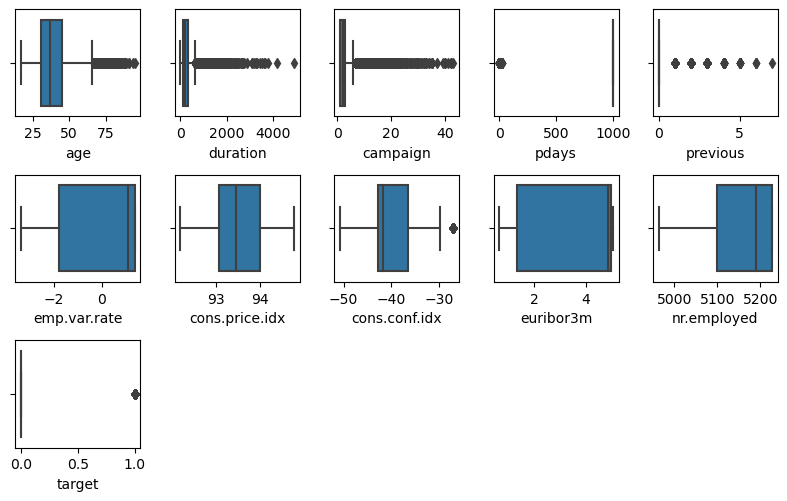

In [25]:
plt.figure(figsize=(8,8))

plotnumber = 1
for kolom in df.describe().columns:

    plt.subplot(5,5, plotnumber)
    sns.boxplot(data=df, x=kolom)

    plotnumber += 1
    
plt.tight_layout()

In [26]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409,0.126574
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065,0.332501
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,0.000000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [27]:
def boundaries(data, variables):
    Q1 = data[variables].quantile(.25)
    Q3 = data[variables].quantile(.75)
    IQR = Q3-Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    return Q1, Q3, IQR, lower, upper

In [28]:
Q1, Q3, IQR, lower, upper = boundaries(df, 'age')
print('Q1 : ', Q1)
print('Q3 : ', Q3)
print('IQR : ', IQR)
print('upper boundaries:', upper)
print('lower boundaries:', lower)

Q1 :  31.0
Q3 :  45.0
IQR :  14.0
upper boundaries: 66.0
lower boundaries: 10.0


In [29]:
age_boundaries = df[df.age > upper]
df = df.drop(age_boundaries.index)

# kita drop usia diatas batas atas, karena di usia lebih dari itu cenderung kurang efektif

In [30]:
bins = [0, 20, 30, 40, 50, 60, 100]

data_age = df[['target', 'age']]
data_age['AGE_GROUP'] = pd.cut(df['age'], bins=bins, labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+'])
data_age = (data_age.groupby(['AGE_GROUP']).mean()).sort_values('target')
data_age

C:\Users\Muhammad Naufal Rafi\AppData\Local\Temp\ipykernel_31980\4048228150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age['AGE_GROUP'] = pd.cut(df['age'], bins=bins, labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+'])


,target,age
AGE_GROUP,,
40-50,0.097079,45.078342
30-40,0.106884,34.940500
50-60,0.134511,54.848351
20-30,0.154351,27.498358
<20,0.376471,19.329412
60+,0.444030,63.250000


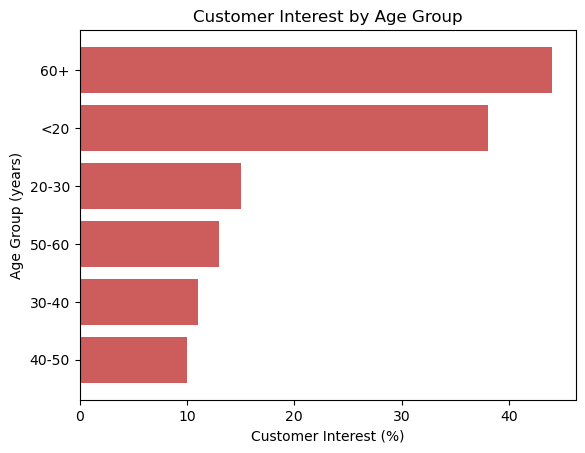

In [31]:
plt.barh(data_age.index.astype(str), round(100*data_age['target']), color='indianred')

plt.ylabel('Age Group (years)')
plt.xlabel('Customer Interest (%)')
plt.title('Customer Interest by Age Group');
plt.show()

In [32]:
Q1, Q3, IQR, lower, upper = boundaries(df, 'cons.conf.idx')
print('Q1 : ', Q1)
print('Q3 : ', Q3)
print('IQR : ', IQR)
print('upper boundaries:', upper)
print('lower boundaries:', lower)

Q1 :  -42.7
Q3 :  -36.4
IQR :  6.300000000000004
upper boundaries: -26.949999999999992
lower boundaries: -52.150000000000006


In [33]:
cons_conf_idx_boundaries = df[df['cons.conf.idx'] > upper]
df = df.drop(cons_conf_idx_boundaries.index)

## Preprocessing

In [34]:
# Duration
df.duration.describe()

# d<60 : 0, kurang 1 menit
# 60<d<180 : 1, dibawah 3 menit
# 180<d<300 : 2, dibawah 5 menit
# 300<d<600 : 3, dibawah 10 menit
# d>600 : 4, lebih dari 10 menit

count    29691.000000
mean       258.913543
std        261.871287
min          0.000000
25%        103.000000
50%        180.000000
75%        320.000000
max       4918.000000
Name: duration, dtype: float64

In [35]:
bins_duration = [0, 60, 180, 300, 600, 5000]

data_duration = df[['target', 'duration']]
data_duration['DURATION_GROUP'] = pd.cut(df['duration'], bins=bins_duration, labels=['<1 min', '1-3 min', '3-5 min', '5-10 min', '10+ min'])
data_duration = (data_duration.groupby(['DURATION_GROUP']).mean()).sort_values('target')
data_duration

C:\Users\Muhammad Naufal Rafi\AppData\Local\Temp\ipykernel_31980\2276989517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_duration['DURATION_GROUP'] = pd.cut(df['duration'], bins=bins_duration, labels=['<1 min', '1-3 min', '3-5 min', '5-10 min', '10+ min'])


,target,duration
DURATION_GROUP,,
<1 min,0.000323,35.257752
1-3 min,0.034927,118.571974
3-5 min,0.111243,232.943783
5-10 min,0.197262,413.462439
10+ min,0.498810,919.890873


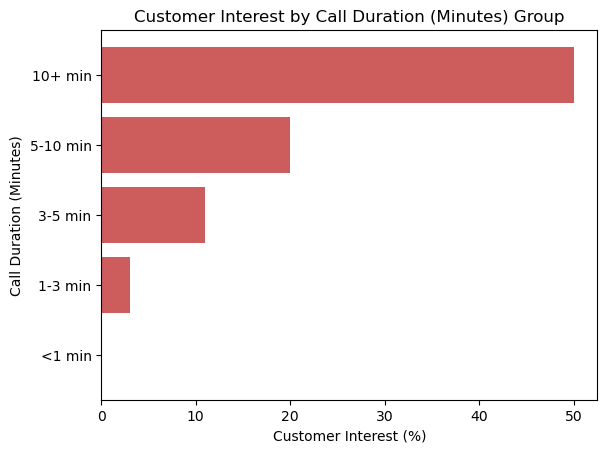

In [36]:
plt.barh(data_duration.index.astype(str), round(100*data_duration['target']), color='indianred')

plt.ylabel('Call Duration (Minutes)')
plt.xlabel('Customer Interest (%)')
plt.title('Customer Interest by Call Duration (Minutes) Group');
plt.show()

In [37]:
df['duration'] = np.where(df['duration'] < 60, 0, 
                 np.where(df['duration'] < 180, 1,
                 np.where(df['duration'] < 300, 2,
                 np.where(df['duration'] < 600, 3, 4))))

df.duration.value_counts()

1    11786
2     6774
3     5574
0     3026
4     2531
Name: duration, dtype: int64

In [38]:
# Campaign

df.campaign.describe()

# campaign <= 3: 0, 2-3 panggilan
# campaign <= 5: 1, 4-5 panggilan
# campaign <= 10: 2, 6-10 panggilan
# campaign > 10: 3, lebih dari 10 panggilan

count    29691.000000
mean         2.540736
std          2.742020
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         43.000000
Name: campaign, dtype: float64

In [39]:
bins_campaign = [1, 3, 5, 10, 45]

data_campaign = df[['target', 'campaign']]
data_campaign['CAMPAIGN_GROUP'] = pd.cut(df['campaign'], bins=bins_campaign, labels=['<3', '3-5', '5-10', '10+'])
data_campaign = (data_campaign.groupby(['CAMPAIGN_GROUP']).mean()).sort_values('target')
data_campaign

C:\Users\Muhammad Naufal Rafi\AppData\Local\Temp\ipykernel_31980\2001616128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_campaign['CAMPAIGN_GROUP'] = pd.cut(df['campaign'], bins=bins_campaign, labels=['<3', '3-5', '5-10', '10+'])


,target,campaign
CAMPAIGN_GROUP,,
10+,0.032203,16.396610
5-10,0.066553,7.266780
3-5,0.094333,4.374713
<3,0.119304,2.334087


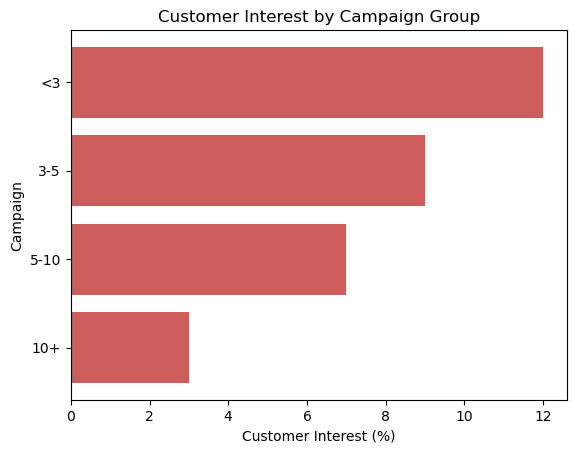

In [40]:
plt.barh(data_campaign.index.astype(str), round(100*data_campaign['target']), color='indianred')

plt.ylabel('Campaign')
plt.xlabel('Customer Interest (%)')
plt.title('Customer Interest by Campaign Group');
plt.show()

In [41]:
df['campaign'] = np.where(df['campaign'] <= 3, 0,
                 np.where(df['campaign'] <= 5, 1,
                 np.where(df['campaign'] <= 10, 2, 3)))

df.campaign.value_counts()

0    24290
1     3053
2     1758
3      590
Name: campaign, dtype: int64

In [42]:
df['default'] = np.where(df['default'] == 'yes', 1, 0)
df['housing'] = np.where(df['housing'] == 'yes', 1, 0)
df['loan'] = np.where(df['loan'] == 'yes', 1, 0)
df['contact'] = np.where(df['contact'] == 'cellular', 1, 0)
df.rename(columns={'contact': 'cellphone'}, inplace=True)


# default -> no: 0, yes: 1
# housing -> no: 0, yes: 1
# loan -> no: 0, yes: 1
# default -> no: 0, yes: 1
# contact / cellphone -> no: 0, yes: 1
# y / target -> no: 0, yes: 1

In [43]:
# Define the age ranges
bins = [0, 20, 30, 40, 50, 60, 100]

# Group the age data into the specified ranges
df['age'] = pd.cut(df['age'], bins=bins, labels=['<20', '20-30', '30-40', '40-50', '50-60', '60+'])
df.rename(columns={'age': 'age_group'}, inplace=True)

In [44]:
df['age_group'] = np.where(df['age_group'] == '<20', 0,
                  np.where(df['age_group'] == '20-30', 1,
                  np.where(df['age_group'] == '30-40', 2,
                  np.where(df['age_group'] == '40-50', 3,
                  np.where(df['age_group'] == '50-60', 4, 5)))))

In [45]:
df['pdays'] = np.where(df['pdays'] <= 7, 0,
              np.where(df['pdays'] <= 30, 1,
              np.where(df['pdays'] <= 180, 2, 3)))

df.campaign.value_counts()

# pdays <= 7: 0, 2-3 panggilan
# pdays <= 30: 1, 4-5 panggilan
# pdays <= 180: 2, 6-10 panggilan
# pdays > 180: 3, lebih dari 10 panggilan

0    24290
1     3053
2     1758
3      590
Name: campaign, dtype: int64

In [46]:
df['education'] = np.where(df['education'] == 'Elementary Education', 0, 
                  np.where(df['education'] == 'Secondary Education', 1, 2))
                           
df['month'] = np.where(df['month'] == 'Q1', 0,
              np.where(df['month'] == 'Q2', 1,
              np.where(df['month'] == 'Q3', 2, 3)))
            
df['day_of_week'] = np.where(df['day_of_week'] == 'mon', 0,
                    np.where(df['day_of_week'] == 'tue', 1,
                    np.where(df['day_of_week'] == 'wed', 2,
                    np.where(df['day_of_week'] == 'thu', 3, 4))))
                           
                           
# education
# Elementary: 0, Secondary 1, Higher 2
                           
# month
# Q1: 0, Q2: 1, Q3: 2, Q4: 3
                           
# day_of_week
# mon: 0, tue:1, wed:3 etc
                           

In [48]:
df.duplicated().sum()

4338

In [49]:
df = df.drop_duplicates(keep='last')

In [50]:
len(df)

25353

In [51]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age_group,int32,0,0.0,6,"[4, 1, 3, 2, 0, 5]"
1,job,object,0,0.0,5,"[Blue Collar, Service Industry, White Collar, ..."
2,marital,object,0,0.0,3,"[married, single, divorced]"
3,education,int32,0,0.0,3,"[0, 1, 2]"
4,default,int32,0,0.0,2,"[0, 1]"
5,housing,int32,0,0.0,2,"[0, 1]"
6,loan,int32,0,0.0,2,"[0, 1]"
7,cellphone,int32,0,0.0,2,"[0, 1]"
8,month,int32,0,0.0,4,"[1, 2, 3, 0]"
9,day_of_week,int32,0,0.0,5,"[0, 1, 2, 3, 4]"


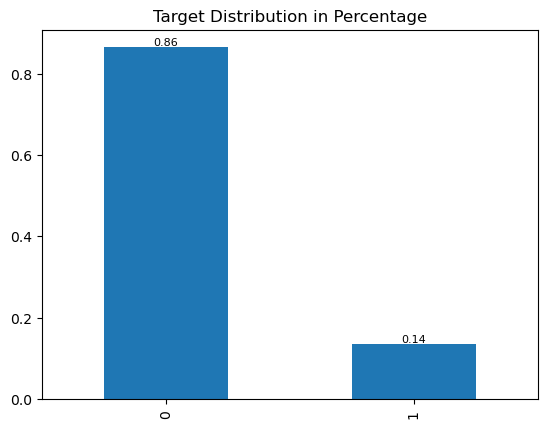

In [54]:
ax = df.target.value_counts(normalize=True).plot(kind='bar')
plt.title('Target Distribution in Percentage')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{x:.2f}" for x in i.datavalues], fontsize=8)
plt.show()

Jika dilihat dari distribusi target diatas dalam hal ini customer yang tertarik pada campaign yang dilakukan cukup sedikit ketimbang yang tidak tertarik.

`0 -> tidak tertarik` : 86%  
`1 -> tertarik` : 14%  

Sehingga dengan demikian dalam membuat sebuah model kedepannya kita perlu mengantisipasi adanya imbalance data untuk menghasilkan output yang tidak bias sehingga mudah intuk di intepretasikan.

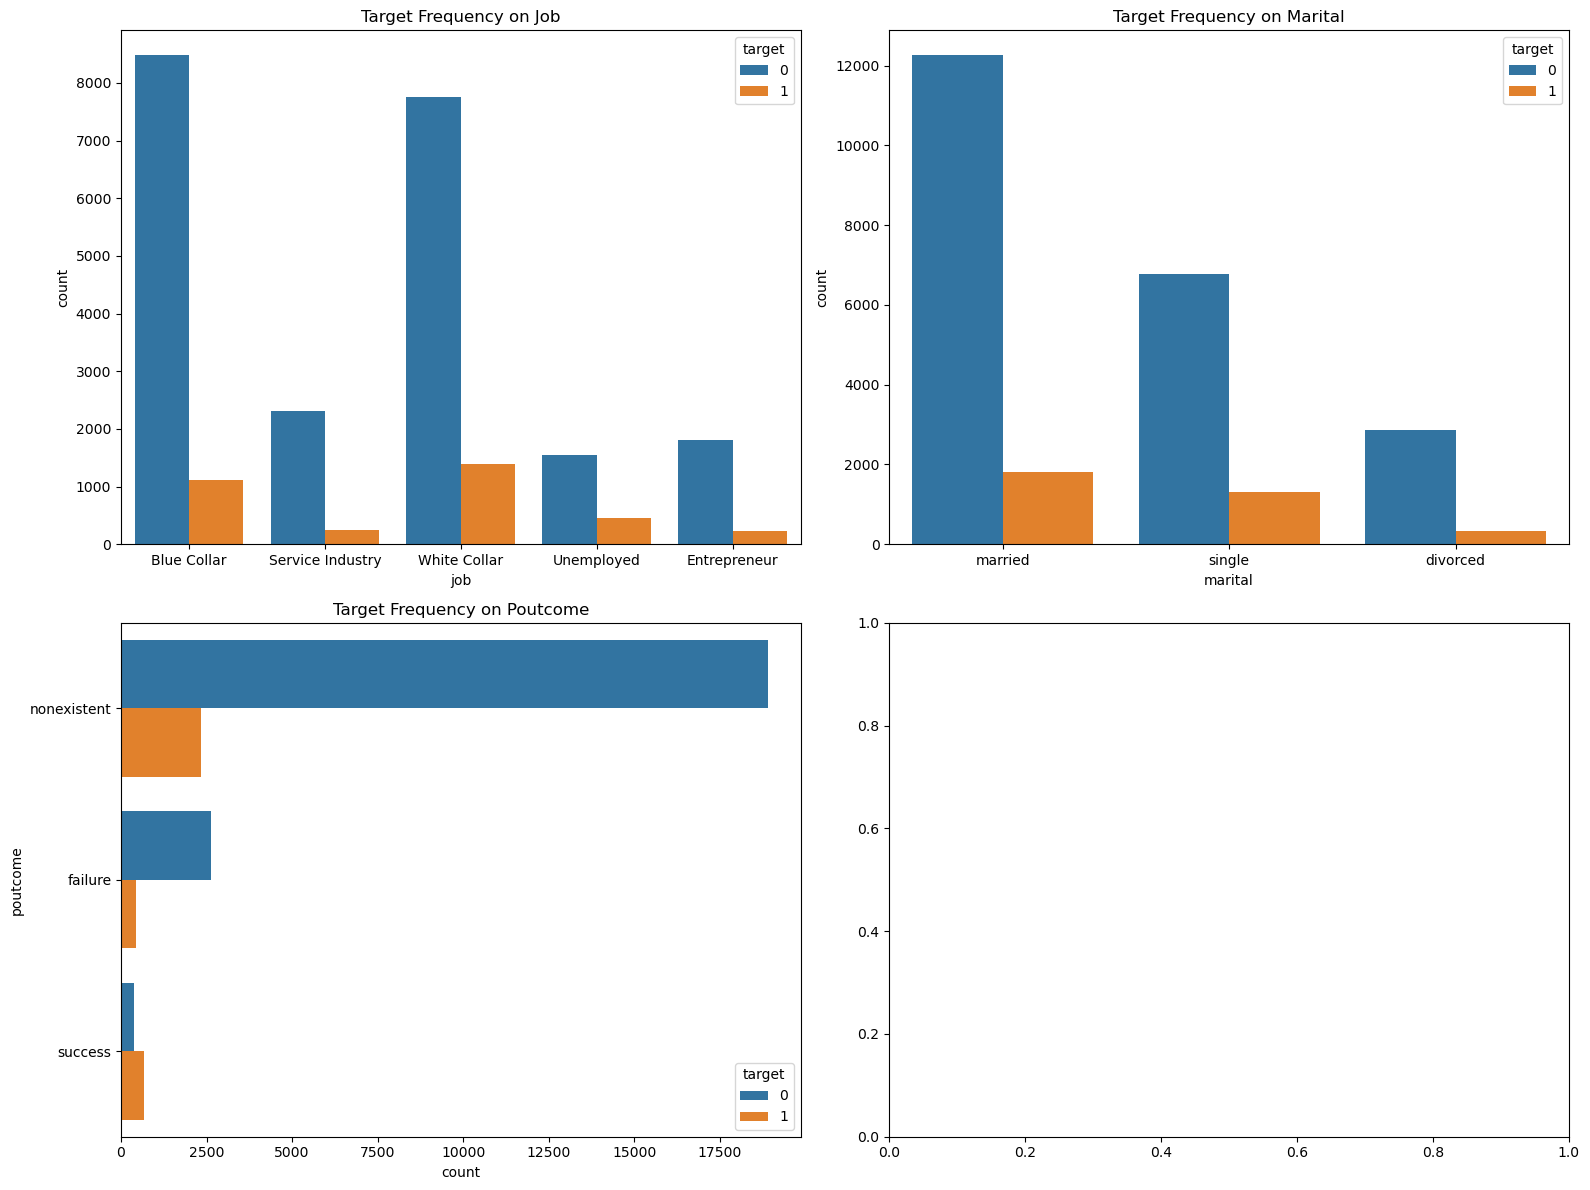

In [57]:
fig, axes = plt.subplots(2,2, figsize=(16,12))

sns.countplot(data=df, x='job', hue='target', ax=axes[0,0]).set_title('Target Frequency on Job')
sns.countplot(data=df, x='marital', hue='target', ax=axes[0,1]).set_title('Target Frequency on Marital')
sns.countplot(data=df, y='poutcome', hue='target', ax=axes[1,0]).set_title('Target Frequency on Poutcome')

plt.tight_layout()

Dari grafik diatas terlihat bahwa:
- berdasarkan tipe pekerjaan, white collar memiliki proporsi tertinggi yang tertarik terhadap kampanye bank.
- berdasarkan marital, married memiliki tingkat panggilan terbanyak....

# Feature Selection

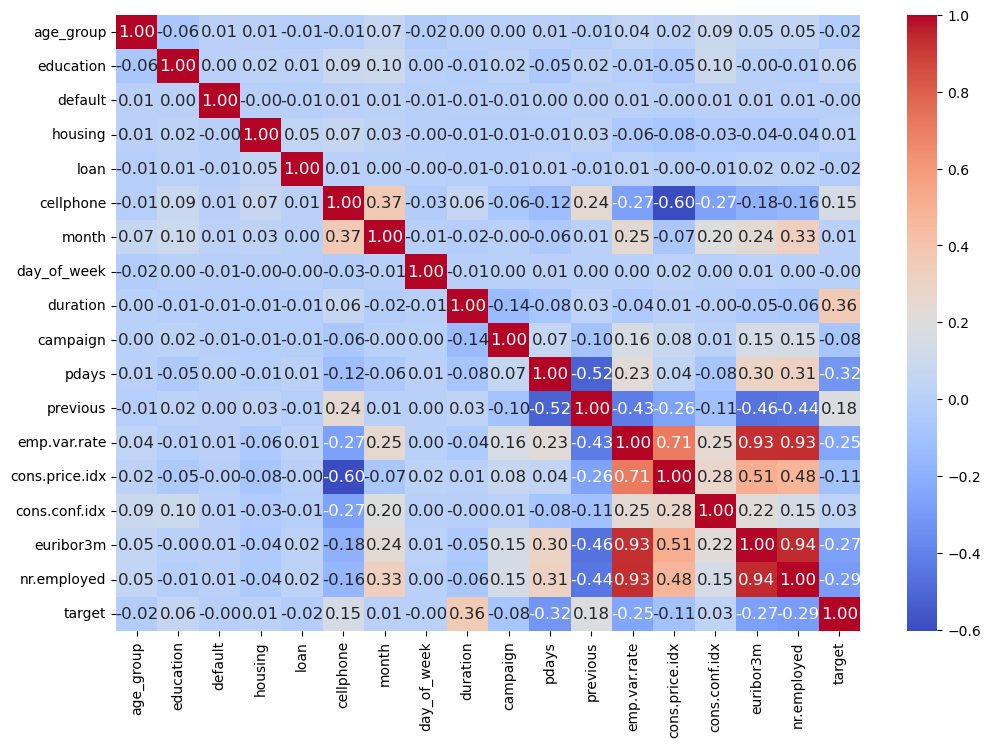

In [73]:
corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'fontsize': 12}, fmt='.2f')
plt.show()


In [96]:
corr_matrix = df.corr(method='spearman')
abs_corr_matrix = abs(corr_matrix)
top_corr_features = abs_corr_matrix.nlargest(11, 'target')['target']

print("Top 10 features sorted by absolute correlation with the target variable:\n")

for rank, feature in enumerate(top_corr_features.index):
    corr_value = corr_matrix.loc['target', feature]
    print(f"{rank+1}. {feature}: {corr_value:.3f}")

Top 10 features sorted by absolute correlation with the target variable:

1. target: 1.000
2. duration: 0.360
3. pdays: -0.319
4. nr.employed: -0.294
5. euribor3m: -0.273
6. emp.var.rate: -0.247
7. previous: 0.184
8. cellphone: 0.150
9. cons.price.idx: -0.106
10. campaign: -0.083
11. education: 0.061


Dari sini terlihat bahwa poin poin diatas merupakan top 10 fitur yang memiliki hubungan terhadap target, namun perlu diingat bahwa ke 10 tersebut belum termasuk beberapa data yang merupakan tipe category sehingga kita akan melakukan double check dengan melakukan uji Chi2 Square untuk memastikan apakah fitur tersebut memang memiliki pengaruh terhadap target.

In [78]:
# Data Split
X = df.drop(columns='target')
y = df['target']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2023, test_size=0.2)

In [80]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

20282 20282
5071 5071


In [81]:
X.describe()

,age_group,education,default,housing,loan,cellphone,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000
mean,2.318503,1.356684,0.000118,0.539739,0.174575,0.660553,1.568414,1.997278,1.797381,0.315150,2.873546,0.206800,-0.081679,93.536507,-40.922940,3.428758,5160.086692
std,0.997613,0.686373,0.010877,0.498428,0.379611,0.473531,0.727659,1.410790,1.163539,0.694668,0.585421,0.538687,1.594487,0.586524,4.573456,1.782300,75.159789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,0.000000,3.000000,0.000000,1.100000,93.444000,-42.000000,4.856000,5191.000000
75%,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,3.000000,0.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,3.000000,3.000000,7.000000,1.400000,94.767000,-29.800000,5.045000,5228.100000


In [82]:
X.describe().columns

Index(['age_group', 'education', 'default', 'housing', 'loan', 'cellphone',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [83]:
X.describe(include='object')

,job,marital,poutcome
count,25353,25353,25353
unique,5,3,3
top,Blue Collar,married,nonexistent
freq,9600,14077,21241


In [104]:
transformer = ColumnTransformer([
    ('scaler', MinMaxScaler(), ['age_group', 'education','month', 'day_of_week',
                                'duration', 'campaign', 'pdays', 'previous',
                                'emp.var.rate', 'cons.price.idx', 
                                'cons.conf.idx', 'euribor3m','nr.employed']),
    ('onehot', OneHotEncoder(drop='first'), ['job', 'marital', 'poutcome'])
], remainder='passthrough')


In [90]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.compose import ColumnTransformer

selector = SelectKBest(score_func=chi2, k=25)
X_train_transformed = transformer.fit_transform(X_train)
X_train_selected = selector.fit_transform(X_train_transformed, y_train)

In [91]:
selected_features = transformer.get_feature_names_out()[selector.get_support()]
selected_features

array(['scaler__age_group', 'scaler__education', 'scaler__month',
       'scaler__day_of_week', 'scaler__duration', 'scaler__campaign',
       'scaler__pdays', 'scaler__previous', 'scaler__emp.var.rate',
       'scaler__cons.price.idx', 'scaler__cons.conf.idx',
       'scaler__euribor3m', 'scaler__nr.employed',
       'onehot__job_Entrepreneur', 'onehot__job_Service Industry',
       'onehot__job_Unemployed', 'onehot__job_White Collar',
       'onehot__marital_married', 'onehot__marital_single',
       'onehot__poutcome_nonexistent', 'onehot__poutcome_success',
       'remainder__default', 'remainder__housing', 'remainder__loan',
       'remainder__cellphone'], dtype=object)

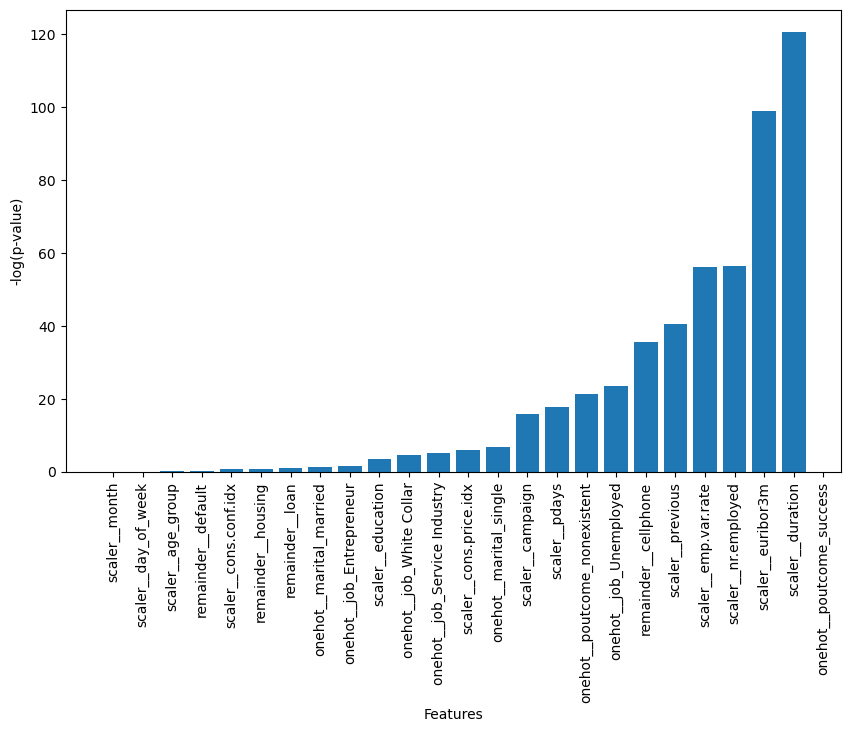

In [93]:
# Get the p-values
p_values = selector.pvalues_
p_values = np.nan_to_num(p_values)

# Sort the features by descending order of -log(p-value)
sorted_idx = (-np.log10(p_values[selector.get_support()])).argsort()

# Plot the sorted p-values
plt.figure(figsize=(10, 6))
plt.bar(selected_features[sorted_idx], -np.log10(p_values[selector.get_support()])[sorted_idx])
plt.xticks(rotation=90)
plt.ylabel('-log(p-value)')
plt.xlabel('Features')
plt.show()

In [95]:
# assume X and y are your feature and target matrices
selector = SelectKBest(chi2, k=25)
X_train_transformed = transformer.fit_transform(X_train)
X_train_selected = selector.fit_transform(X_train_transformed, y_train)
selector.fit(X_train_selected, y_train)

# get the chi2 scores for all the features
chi2_scores = selector.scores_
chi2_scores
# create a pandas dataframe to display the chi2 scores
chi2_df = pd.DataFrame({'Feature': selected_features, 'Chi2 Score': chi2_scores})
chi2_df = chi2_df.sort_values(by='Chi2 Score', ascending=False)
chi2_df.reset_index()

,index,Feature,Chi2 Score
0,20,onehot__poutcome_success,1784.664806
1,4,scaler__duration,548.523571
2,11,scaler__euribor3m,448.922807
3,12,scaler__nr.employed,253.806385
4,8,scaler__emp.var.rate,252.546075
5,7,scaler__previous,181.083995
6,24,remainder__cellphone,157.556418
7,15,onehot__job_Unemployed,103.599570
8,19,onehot__poutcome_nonexistent,93.673257
9,6,scaler__pdays,76.278314


Tabel tersebut menunjukkan hasil dari uji chi-squared (Chi2) pada 25 fitur yang digunakan dalam pemodelan. Uji ini mengukur kekuatan hubungan antara setiap fitur dan variabel target.

Hasilnya menunjukkan bahwa fitur "onehot__poutcome_success" memiliki Chi2 Score tertinggi, yaitu 1784.664806, yang menunjukkan bahwa fitur tersebut memiliki hubungan yang kuat dengan variabel target. Fitur kedua dengan nilai Chi2 Score tertinggi adalah "scaler__duration" dengan nilai 548.523571, yang juga menunjukkan hubungan yang kuat dengan variabel target.

Selanjutnya, fitur-fitur lainnya juga memiliki nilai Chi2 Score yang cukup tinggi, yang menunjukkan bahwa fitur-fitur tersebut memiliki hubungan yang signifikan dengan variabel target.

Dari tabel tersebut, kita juga dapat melihat bahwa ada beberapa fitur yang memiliki nilai Chi2 Score yang relatif rendah, seperti "scaler__age_group", "scaler__month", dan "scaler__day_of_week", yang menunjukkan bahwa fitur-fitur tersebut memiliki hubungan yang lemah dengan variabel target.

**Apa itu Chi2 Score?**  
Chi-squared score atau Chi-squared statistic (nilai Chi-kuadrat) adalah ukuran statistik yang digunakan untuk mengevaluasi seberapa jauh pengamatan aktual terdistribusi dari apa yang diharapkan dalam sebuah percobaan. Nilai Chi-kuadrat digunakan dalam analisis statistik untuk menguji hipotesis nol, di mana pengamatan aktual diharapkan sama dengan nilai yang diharapkan atau menguji hubungan antara dua variabel. Semakin besar nilai Chi-kuadrat, semakin besar kemungkinan bahwa hubungan atau perbedaan antara dua variabel adalah signifikan secara statistik. Dalam konteks pemodelan statistik, nilai Chi-kuadrat juga digunakan sebagai fitur penting dalam pemilihan fitur atau pemilihan model, di mana nilai yang lebih tinggi menunjukkan fitur yang lebih penting atau relevan dalam menjelaskan data.

Dari informasi, kita akan menggunakan fitur yang memiliki chi2 score diatas dari 20 dalam pengembangan model machine learning yang akan kita lakukan.
1. Poutcome
2. Duration
3. euribor3m
4. nr.employed
5. emp.var.rate
6. previous
7. cellphone
8. job
9. pdays
10. campaign
11. marital
12. cons.price.idx


Poin di atas adalah fitur-fitur yang memiliki potensi hubungan dengan keputusan nasabah untuk berlangganan atau tertarik dengan produk bank dalam kampanye pemasaran. Berikut adalah penjelasan singkat tentang hubungan masing-masing fitur dengan target:

1. `Poutcome`: Fitur ini adalah hasil dari kampanye pemasaran sebelumnya, yaitu apakah nasabah berlangganan produk atau tidak. Fitur ini memiliki hubungan kuat dengan keputusan nasabah untuk berlangganan atau tidak dalam kampanye pemasaran saat ini.

2. `Duration`: Fitur ini adalah durasi panggilan dalam detik. Fitur ini memiliki hubungan kuat dengan keputusan nasabah untuk berlangganan atau tidak dalam kampanye pemasaran. Semakin lama durasi panggilan, semakin besar kemungkinan nasabah berlangganan.

3. `Euribor3m`: Fitur ini adalah tingkat suku bunga euribor 3 bulan. Fitur ini memiliki hubungan yang cukup kuat dengan keputusan nasabah untuk berlangganan atau tidak dalam kampanye pemasaran. Semakin rendah tingkat suku bunga, semakin besar kemungkinan nasabah berlangganan.

4. `Nr.employed`: Fitur ini adalah jumlah karyawan yang bekerja di bank pada waktu kampanye pemasaran. Fitur ini memiliki hubungan yang cukup kuat dengan keputusan nasabah untuk berlangganan atau tidak dalam kampanye pemasaran. Semakin banyak karyawan, semakin besar kemungkinan nasabah berlangganan.

5. `Emp.var.rate`: Fitur ini adalah tingkat variasi pengangguran. Fitur ini memiliki hubungan yang cukup kuat dengan keputusan nasabah untuk berlangganan atau tidak dalam kampanye pemasaran. Semakin rendah tingkat variasi pengangguran, semakin besar kemungkinan nasabah berlangganan.

6. `Previous`: Fitur ini adalah jumlah kontak sebelumnya yang dilakukan oleh bank kepada nasabah. Fitur ini memiliki hubungan yang cukup kuat dengan keputusan nasabah untuk berlangganan atau tidak dalam kampanye pemasaran. Semakin banyak kontak sebelumnya, semakin besar kemungkinan nasabah berlangganan.

7. `Cellphone`: Fitur ini menunjukkan apakah nasabah memiliki nomor telepon seluler atau tidak. Fitur ini memiliki hubungan yang cukup kuat dengan keputusan nasabah untuk berlangganan atau tidak dalam kampanye pemasaran. Jika nasabah memiliki nomor telepon seluler, kemungkinan besar ia akan lebih responsif terhadap panggilan telepon kampanye pemasaran.

8. `Job`: Fitur ini menunjukkan pekerjaan nasabah. Fitur ini memiliki hubungan yang cukup kuat dengan keputusan nasabah untuk berlangganan atau tidak dalam kampanye pemasaran. Beberapa jenis pekerjaan mungkin lebih cenderung untuk berlangganan dibandingkan dengan jenis pekerjaan lainnya.

9. `Pdays`: Fitur ini adalah jumlah hari sejak kontak sebelumnya dengan nasabah. Fitur ini memiliki hubungan yang cukup kuat dengan keputusan nasabah untuk berlangganan atau tidak dalam kampanye pemasaran.

10. `Campaign`: Jumlah kampanye pemasaran yang dilakukan oleh bank sebelumnya dapat memengaruhi keputusan nasabah untuk berlangganan pada kampanye saat ini.

11. `Marital`: Status pernikahan nasabah dapat memengaruhi keputusan mereka dalam berlangganan produk bank.

12. `Cons.price.idx`: Indeks harga konsumen dapat memengaruhi keputusan nasabah, terutama dalam kondisi ekonomi yang sulit.

# Modeling 

In [98]:
data = df[['poutcome', 'duration', 'euribor3m', 'nr.employed', 'emp.var.rate',
           'previous', 'cellphone', 'job', 'pdays', 'campaign', 'marital', 
           'cons.price.idx', 'target']]
data.head()

,poutcome,duration,euribor3m,nr.employed,emp.var.rate,previous,cellphone,job,pdays,campaign,marital,cons.price.idx,target
0,nonexistent,2,4.857,5191.0,1.1,0,0,Blue Collar,3,0,married,93.994,0
4,nonexistent,3,4.857,5191.0,1.1,0,0,Service Industry,3,0,married,93.994,0
6,nonexistent,1,4.857,5191.0,1.1,0,0,White Collar,3,0,married,93.994,0
8,nonexistent,3,4.857,5191.0,1.1,0,0,Blue Collar,3,0,single,93.994,0
9,nonexistent,0,4.857,5191.0,1.1,0,0,Service Industry,3,0,single,93.994,0


In [105]:
# Data Split
X = data.drop(columns='target')
y = data['target']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2023, test_size=0.2)

In [107]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

20282 20282
5071 5071


In [108]:
X.describe()

,duration,euribor3m,nr.employed,emp.var.rate,previous,cellphone,pdays,campaign,cons.price.idx
count,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000,25353.000000
mean,1.797381,3.428758,5160.086692,-0.081679,0.206800,0.660553,2.873546,0.315150,93.536507
std,1.163539,1.782300,75.159789,1.594487,0.538687,0.473531,0.585421,0.694668,0.586524
min,0.000000,0.634000,4963.600000,-3.400000,0.000000,0.000000,0.000000,0.000000,92.201000
25%,1.000000,1.313000,5099.100000,-1.800000,0.000000,0.000000,3.000000,0.000000,93.075000
50%,2.000000,4.856000,5191.000000,1.100000,0.000000,1.000000,3.000000,0.000000,93.444000
75%,3.000000,4.961000,5228.100000,1.400000,0.000000,1.000000,3.000000,0.000000,93.994000
max,4.000000,5.045000,5228.100000,1.400000,7.000000,1.000000,3.000000,3.000000,94.767000


In [109]:
X.describe(include='object')

,poutcome,job,marital
count,25353,25353,25353
unique,3,5,3
top,nonexistent,Blue Collar,married
freq,21241,9600,14077


In [112]:
transformer = ColumnTransformer([
    ('scaler', MinMaxScaler(), ['duration', 'campaign', 'pdays', 'previous',
                                'emp.var.rate', 'cons.price.idx',
                                'euribor3m','nr.employed']),
    ('onehot', OneHotEncoder(drop='first'), ['job', 'marital', 'poutcome'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', MinMaxScaler(),
                                 ['duration', 'campaign', 'pdays', 'previous',
                                  'emp.var.rate', 'cons.price.idx', 'euribor3m',
                                  'nr.employed']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['job', 'marital', 'poutcome'])])

Kode di atas mengambil beberapa kolom dari DataFrame df dan menyimpannya dalam variabel data. Kolom yang diambil adalah 'poutcome', 'duration', 'euribor3m', nr.employed', 'emp.var.rate', 'previous', 'cellphone', 'job', 'pdays', 'campaign', 'marital', 'cons.price.idx', dan 'target'.

Selanjutnya, kode membuat sebuah transformer menggunakan ColumnTransformer dari scikit-learn. Transformer ini terdiri dari dua transformer, yaitu scaler dan onehot.

Scaler menggunakan MinMaxScaler untuk mengubah nilai-nilai pada kolom 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', dan 'nr.employed' ke dalam rentang [0,1]. Hal ini berguna untuk membuat perbedaan skala antara kolom-kolom tersebut menjadi lebih kecil sehingga pengaruh kolom-kolom tersebut dalam model menjadi lebih seimbang.

Onehot menggunakan OneHotEncoder untuk mengubah kolom-kolom 'job', 'marital', dan 'poutcome' menjadi representasi one-hot encoding. Representasi ini berguna untuk mengubah kolom-kolom kategorikal menjadi bentuk numerik yang dapat dimengerti oleh model.

'Remainder' dalam transformer ini diatur sebagai 'passthrough', yang berarti semua kolom yang tidak diubah oleh transformer (yaitu 'cellphone') akan dilewatkan ke output transformer tanpa diubah.





In [113]:
data.to_csv('data_cleaned.csv', index=False)

## Modeling Base

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, confusion_matrix
from imblearn.over_sampling import ADASYN
from sklearn.metrics import balanced_accuracy_score

# Models
logreg=LogisticRegression(random_state=2023)
forest=RandomForestClassifier(random_state=2023)
gboost=GradientBoostingClassifier(random_state=2023)

# OverSampling
ros = RandomOverSampler(random_state=2023)
smote = SMOTE(random_state=2023)
adasyn = ADASYN(random_state=2023)

# UnderSampling
rus = RandomUnderSampler(random_state=2023)
nearmiss = NearMiss()

# Kfold
skfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

In [117]:
models = [logreg, forest, gboost]
rata = []
acc = []
rec = []
prec = []
f1 = []
ba = []

for i in models:
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', i)
    ])
    roc_auc_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='roc_auc')
    rata.append(roc_auc_cv.mean())
    acc_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='accuracy')
    acc.append(acc_cv.mean())
    rec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')
    rec.append(rec_cv.mean())
    prec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='precision')
    prec.append(prec_cv.mean())
    f1_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='f1')
    f1.append(f1_cv.mean())
    ba_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='balanced_accuracy')
    ba.append(ba_cv.mean())

metrics_df = pd.DataFrame({
    'model': ['Logistic Regression', 'Random Forest', 'GBoost'],
    'mean roc_auc': rata,
    'mean accuracy': acc,
    'mean recall': rec,
    'mean precision': prec,
    'mean f1 score': f1,
    'mean balanced accuracy': ba
}).set_index('model').sort_values(by='mean roc_auc', ascending=False)

metrics_df

,mean roc_auc,mean accuracy,mean recall,mean precision,mean f1 score,mean balanced accuracy
model,,,,,,
GBoost,0.928578,0.893995,0.471898,0.652272,0.547429,0.716149
Logistic Regression,0.903871,0.887832,0.370337,0.655016,0.473105,0.669790
Random Forest,0.893942,0.880189,0.500167,0.567507,0.531633,0.720069


**With Random Oversampling**

In [118]:
models = [logreg, forest, gboost]
rata = []
acc = []
rec = []
prec = []
f1 = []
ba = []

for i in models:
    estimator = Pipeline([
        ('preprocess', transformer),
        ('ros', ros),
        ('model', i)
    ])
    roc_auc_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='roc_auc')
    rata.append(roc_auc_cv.mean())
    acc_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='accuracy')
    acc.append(acc_cv.mean())
    rec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')
    rec.append(rec_cv.mean())
    prec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='precision')
    prec.append(prec_cv.mean())
    f1_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='f1')
    f1.append(f1_cv.mean())
    ba_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='balanced_accuracy')
    ba.append(ba_cv.mean())

metrics_df = pd.DataFrame({
    'model': ['Logistic Regression', 'Random Forest', 'GBoost'],
    'mean roc_auc': rata,
    'mean accuracy': acc,
    'mean recall': rec,
    'mean precision': prec,
    'mean f1 score': f1,
    'mean balanced accuracy': ba
}).set_index('model').sort_values(by='mean roc_auc', ascending=False)

metrics_df

,mean roc_auc,mean accuracy,mean recall,mean precision,mean f1 score,mean balanced accuracy
model,,,,,,
GBoost,0.928896,0.842865,0.873764,0.459174,0.601934,0.855883
Logistic Regression,0.904113,0.824672,0.855627,0.427706,0.570255,0.837714
Random Forest,0.885566,0.848684,0.655047,0.460683,0.540710,0.767096


**With Random Undersampling**

In [119]:
models = [logreg, forest, gboost]
rata = []
acc = []
rec = []
prec = []
f1 = []
ba = []

for i in models:
    estimator = Pipeline([
        ('preprocess', transformer),
        ('ros', rus),
        ('model', i)
    ])
    roc_auc_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='roc_auc')
    rata.append(roc_auc_cv.mean())
    acc_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='accuracy')
    acc.append(acc_cv.mean())
    rec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='recall')
    rec.append(rec_cv.mean())
    prec_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='precision')
    prec.append(prec_cv.mean())
    f1_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='f1')
    f1.append(f1_cv.mean())
    ba_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='balanced_accuracy')
    ba.append(ba_cv.mean())

metrics_df = pd.DataFrame({
    'model': ['Logistic Regression', 'Random Forest', 'GBoost'],
    'mean roc_auc': rata,
    'mean accuracy': acc,
    'mean recall': rec,
    'mean precision': prec,
    'mean f1 score': f1,
    'mean balanced accuracy': ba
}).set_index('model').sort_values(by='mean roc_auc', ascending=False)

metrics_df

,mean roc_auc,mean accuracy,mean recall,mean precision,mean f1 score,mean balanced accuracy
model,,,,,,
GBoost,0.927237,0.836850,0.878843,0.448927,0.594224,0.854543
Random Forest,0.903554,0.814170,0.850550,0.411374,0.554485,0.829497
Logistic Regression,0.902875,0.822749,0.854901,0.424847,0.567506,0.836295


## Predict to Model Base

Kita akan mencoba melakukan predict ke model baseline berdasarkan hasil terbaik yaitu diantara Gradient Boost Classifier dengan Random oversampling / undersampling.

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      4382
           1       0.47      0.89      0.62       689

    accuracy                           0.85      5071
   macro avg       0.73      0.87      0.76      5071
weighted avg       0.91      0.85      0.87      5071

Confusion Matrix:


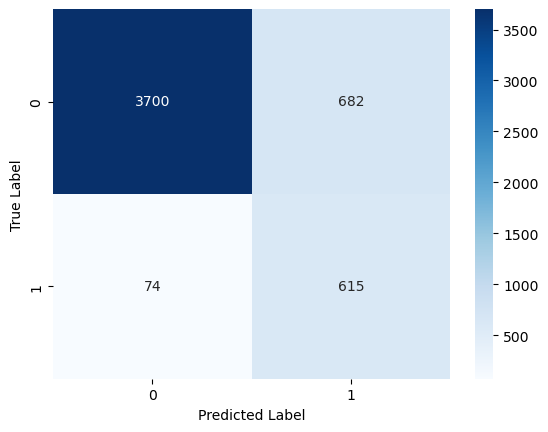

ROC AUC Score: 0.9345347671798935
Balanced Acc: 0.8684806362484342




In [122]:
estimator = Pipeline([
        ('preprocess', transformer),
        ('ros', ros),
        ('model', gboost)
    ])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]

# Generate evaluation metrics
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))
print('Balanced Acc:', balanced_accuracy_score(y_test, y_pred))
print('\n')

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      4382
           1       0.45      0.90      0.60       689

    accuracy                           0.84      5071
   macro avg       0.71      0.86      0.75      5071
weighted avg       0.91      0.84      0.86      5071

Confusion Matrix:


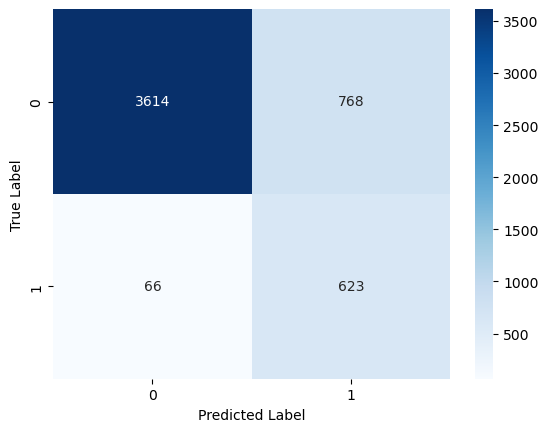

ROC AUC Score: 0.9316325063808335
Balanced Acc: 0.8644732806526767




In [123]:
estimator = Pipeline([
        ('preprocess', transformer),
        ('ros', rus),
        ('model', gboost)
    ])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]

# Generate evaluation metrics
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))
print('Balanced Acc:', balanced_accuracy_score(y_test, y_pred))
print('\n')

Dari hasil modeling base diatas, kita akan menggunakan model Gradient Boosting Classifier dengan random oversampling untuk mengatasi proporsi yang tidak seimbang / `imbalance data` hal ini didasarkan dari nilai roc auc serta nilai f1 score yang lebih baik ketimbang model tanpa random oversampling. Maka selanjutnya akan dilakukan Hyperparameter tuning untuk menghasilkan output yang optimal.

## Hyperparameter Tuning

In [125]:
# RandomizedSearchCV
%time
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
# hyperparameter untuk GradientBoost
hyperparam = {'modeling__learning_rate': [0.001, 0.01, 0.1, 0.5],
              'modeling__n_estimators': [50, 100, 200, 500],
              'modeling__max_depth': [3, 5, 7, 9],
              'modeling__min_samples_split': sp_randint(2, 20),
              'modeling__min_samples_leaf': sp_randint(1, 20),
              'modeling__max_features': sp_randint(2, 20),
              'modeling__subsample': uniform(0.5, 0.5),
              'modeling__random_state': [42]}

# model
model = GradientBoostingClassifier()

# untuk estimator
pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('resample', ros),
        ('modeling', model)
    ])

randomsearch = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam,
    cv= 10,
    scoring= 'roc_auc',
    random_state=0,
    n_jobs= -1,
    n_iter= 200
)

randomsearch.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               MinMaxScaler(),
                                                                               ['duration',
                                                                                'campaign',
                                                                                'pdays',
                                                                                'previous',
                                                                                'emp.var.rate',
                                                                                'cons.price.idx',
                                                                                'euribor3m',
                                                                                'nr.employed']),
                                                                              ('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['job',
                                                                                'marital',
                                                                                'poutcome'])])),
                                             ('resample',
                                              RandomOverSample...
                                        'modeling__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C4237EFFD0>,
                                        'modeling__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C423813A60>,
                                        'modeling__n_estimators': [50, 100, 200,
                                                                   500],
                                        'modeling__random_state': [42],
                                        'modeling__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C429A89480>},
                   random_state=0, scoring='roc_auc')

In [126]:
randomsearch.best_params_

{'modeling__learning_rate': 0.1,
 'modeling__max_depth': 3,
 'modeling__max_features': 17,
 'modeling__min_samples_leaf': 9,
 'modeling__min_samples_split': 2,
 'modeling__n_estimators': 200,
 'modeling__random_state': 42,
 'modeling__subsample': 0.8981957372586659}

GradientBoostingClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      4382
           1       0.48      0.89      0.62       689

    accuracy                           0.85      5071
   macro avg       0.73      0.87      0.77      5071
weighted avg       0.91      0.85      0.87      5071

Confusion Matrix:


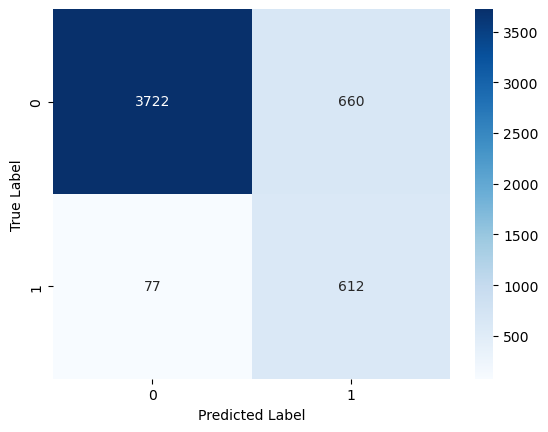

ROC AUC Score: 0.9357191876783172
Balanced Score: 0.8688138373170624




In [127]:
# Define model and pipeline
model = GradientBoostingClassifier(subsample=0.8981957372586659,
                                   n_estimators=200,
                                   max_features=17,
                                   max_depth = 3,
                                   learning_rate=0.1,
                                   min_samples_leaf=9, 
                                   min_samples_split=2,
                                   random_state=42)
estimator = Pipeline([
    ('preprocess', transformer),
    ('resample', ros),
    ('model', model)
])

# Fit model and make predictions
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred_proba = estimator.predict_proba(X_test)[:, 1]

# Generate evaluation metrics
print(model.__class__.__name__)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))
print('Balanced Score:', balanced_accuracy_score(y_test, y_pred))
print('\n')

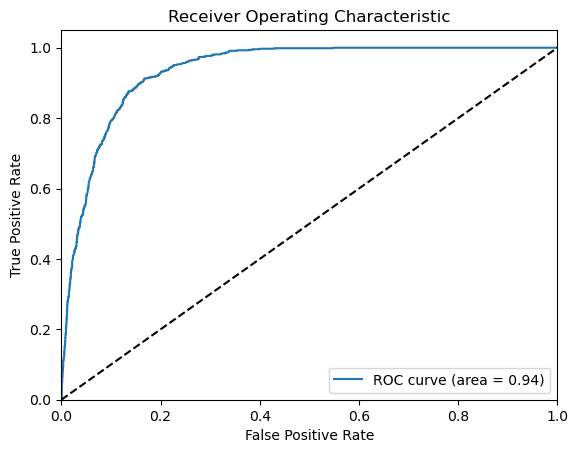

In [128]:
# Import necessary libraries
from sklearn.metrics import roc_curve

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Berdasarkan hasil hyperparameter tuning yang telah dilakukan dengan menggunakan model GradientBoost Classifier dengan random oversampling, didapatkan nilai `ROC AUC Score` adalah sebesar `94%`, dengan demikian dapat disimpulkan bahwa model memiliki kinerja yang sangat baik dalam membedakan antara kelas kelas tersebut.

# Feature Importance

In [135]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Print correlation of each feature with target
print(corr_matrix['target'].sort_values(ascending=False))

target            1.000000
duration          0.378584
previous          0.215020
cellphone         0.150389
campaign         -0.084169
cons.price.idx   -0.113137
emp.var.rate     -0.286745
euribor3m        -0.298398
pdays            -0.318348
nr.employed      -0.345322
Name: target, dtype: float64


In [129]:
estimator['model'].feature_importances_

array([5.08212422e-01, 1.59797877e-03, 1.66830672e-02, 2.85535170e-03,
       4.06545804e-02, 3.10550431e-02, 1.27747240e-01, 2.52263136e-01,
       2.57771683e-04, 1.16076704e-03, 1.52672908e-03, 6.98508875e-04,
       5.48793812e-04, 1.09473293e-03, 1.63642227e-03, 5.25008754e-03,
       6.75736748e-03])

In [130]:
estimator['preprocess'].get_feature_names_out()

array(['scaler__duration', 'scaler__campaign', 'scaler__pdays',
       'scaler__previous', 'scaler__emp.var.rate',
       'scaler__cons.price.idx', 'scaler__euribor3m',
       'scaler__nr.employed', 'onehot__job_Entrepreneur',
       'onehot__job_Service Industry', 'onehot__job_Unemployed',
       'onehot__job_White Collar', 'onehot__marital_married',
       'onehot__marital_single', 'onehot__poutcome_nonexistent',
       'onehot__poutcome_success', 'remainder__cellphone'], dtype=object)

In [131]:
df_imp = pd.DataFrame({
    'feature': estimator['preprocess'].get_feature_names_out(),
    'importance': estimator['model'].feature_importances_*100
})

df_imp = df_imp.sort_values('importance', ascending=False)
df_imp

,feature,importance
0,scaler__duration,50.821242
7,scaler__nr.employed,25.226314
6,scaler__euribor3m,12.774724
4,scaler__emp.var.rate,4.065458
5,scaler__cons.price.idx,3.105504
2,scaler__pdays,1.668307
16,remainder__cellphone,0.675737
15,onehot__poutcome_success,0.525009
3,scaler__previous,0.285535
14,onehot__poutcome_nonexistent,0.163642


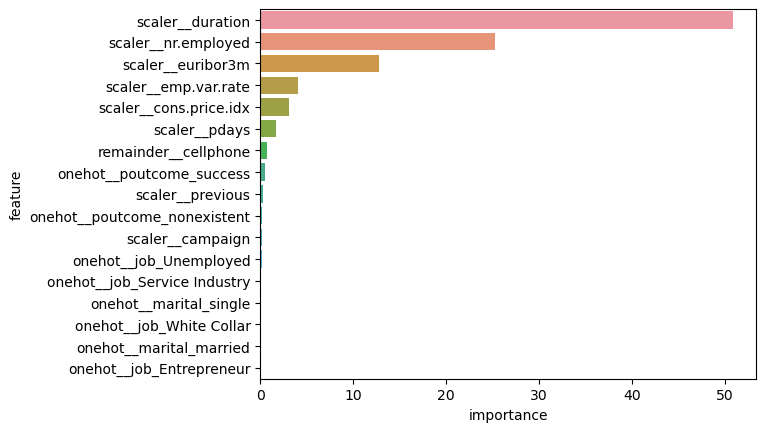

In [132]:
sns.barplot(data=df_imp, x = 'importance', y = 'feature');

Jika diperhatikan dari poin-poin diatas, top 5 fitur yang memiliki pengaruh pada model adalah `duration`, `nr.employed`, `euribor3m`, `emp.var.rate`, `cons.price.idx`. Namun apakah maksud dari kelima fitur itu? Untuk mengintepretasikan nya kita perlu kembali ke tabel korelasi yang telah kita lakukan pada langkah sebelumnya jadi penjelasannya adalah sebagai berikut:

1. duration: memiliki korelasi positif yang cukup kuat dengan target (0.378) dan memiliki feature importance yang sangat tinggi (50.8). Fitur ini mengindikasikan durasi dalam detik dari panggilan terakhir ke nasabah, sehingga semakin lama durasinya maka semakin besar kemungkinan nasabah akan menerima penawaran produk.

2. euribor3m: memiliki korelasi negatif yang cukup kuat dengan target (-0.298) namun memiliki feature importance yang tinggi (12.77). Euribor3m adalah suku bunga interbank untuk penawaran simpanan dengan jangka waktu 3 bulan di pasar uang Euro. Semakin tinggi suku bunga Euribor3m, semakin rendah kemungkinan nasabah akan menerima penawaran produk.

3. nr.employed: memiliki korelasi negatif yang cukup kuat dengan target (-0.345) dan memiliki feature importance yang sangat tinggi (25.23). Nr.employed mengindikasikan jumlah karyawan yang bekerja di bank pada saat panggilan pemasaran. Semakin banyak karyawan yang bekerja di bank, semakin kecil kemungkinan nasabah akan menerima penawaran produk.

4. emp.var.rate: memiliki korelasi negatif yang cukup kuat dengan target (-0.287) dan memiliki feature importance yang cukup tinggi (4.07). Emp.var.rate merupakan variabel indikator kenaikan atau penurunan tingkat pengangguran dalam perekonomian. Semakin rendah emp.var.rate, semakin kecil kemungkinan nasabah akan menerima penawaran produk.

5. cons.price.idx: memiliki korelasi negatif yang lemah dengan target (-0.113) dan memiliki feature importance yang cukup tinggi (3.11). Cons.price.idx adalah indeks harga konsumen, yang mengindikasikan rata-rata harga konsumen di pasar. Semakin rendah cons.price.idx, semakin kecil kemungkinan nasabah akan menerima penawaran produk.

# Rekomendasi

Berdasarkan analisis korelasi dan feature importance yang telah dilakukan, dapat diambil beberapa solusi dan rekomendasi dalam hal bank marketing campaign:

- Durasi panggilan (duration) memiliki korelasi positif yang kuat dengan keputusan nasabah untuk berlangganan deposito. Oleh karena itu, perlu fokus dalam kampanye untuk memberikan penawaran yang menarik dan meyakinkan kepada nasabah yang terlibat dalam percakapan telepon. Misalnya, menyediakan promosi khusus untuk nasabah yang berlangganan deposito dalam jangka waktu tertentu.

- Nilai nr.employed dan euribor3m memiliki korelasi negatif yang kuat dengan keputusan nasabah untuk berlangganan deposito. Oleh karena itu, bank dapat mempertimbangkan untuk menurunkan suku bunga atau menawarkan program diskon khusus kepada nasabah yang tertarik untuk membuka deposito dalam jangka waktu tertentu.

- Emp.var.rate dan cons.price.idx juga memiliki korelasi negatif dengan keputusan nasabah untuk berlangganan deposito. Oleh karena itu, bank dapat mempertimbangkan untuk mempromosikan produk investasi atau tabungan dengan bunga yang lebih tinggi, atau menyediakan program hadiah bagi nasabah yang menyetorkan sejumlah uang dalam deposito.

Dalam hal kampanye marketing bank, penting juga untuk mempertimbangkan faktor lain seperti segmentasi nasabah, demografi, dan preferensi mereka dalam memilih produk dan layanan perbankan. Dengan analisis yang cermat, bank dapat menyesuaikan strategi kampanye mereka untuk memaksimalkan keberhasilan dan efektivitas kampanye tersebut.